In [1]:
import os
import torch
import copy
import torch.nn as nn
import torch.nn.functional as F
import imageio
from tqdm import tqdm
from matplotlib import pyplot as plt
import random
import numpy as np
import seaborn as sns
import pandas as pd
from siren_pytorch import SirenNet
from prdc import compute_prdc
from torchsummary import summary

seed = 0
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

In [2]:
data_points = torch.load("mog.pt")
data_points -= torch.mean(data_points, 0)
data_points = data_points.to(torch.float32)

In [3]:
zdim = 32

In [4]:
class Generator(nn.Module):
    def __init__(self, n_mlp=5, in_dim=32, out_dim=2, hidden_dim=128):
        super().__init__()
        assert(n_mlp >= 2)

        layers = [nn.Linear(in_dim, hidden_dim), nn.LeakyReLU(0.2)]
        for i in range(n_mlp - 2):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_dim, out_dim))
        self.layers = nn.Sequential(*layers)
#         self.apply(init_weights)        


    def forward(self, latents):
        return self.layers(latents)

In [5]:
splatter_mixed = torch.load("./plots-mog/ada_gauss_mixed.pth")
splatter_1 = torch.load("./plots-mog/ada_gauss_1.pth")
splatter_5 = torch.load("./plots-mog/ada_gauss_5.pth")
splatter_10 = torch.load("./plots-mog/ada_gauss_10.pth")



In [30]:
nz_fake = data_points.shape[0]*1
zs_fake = torch.randn(nz_fake, zdim)
fake = splatter_mixed(zs_fake).cpu().detach().numpy()
fake_1 = splatter_1(zs_fake).cpu().detach().numpy()
fake_5 = splatter_5(zs_fake).cpu().detach().numpy()

metrics = compute_prdc(real_features=data_points,
                       fake_features=fake,
                       nearest_k=3)

print(metrics)

Num real: 200 Num fake: 200
{'precision': 0.895, 'recall': 0.785, 'density': 2.425, 'coverage': 1.0}


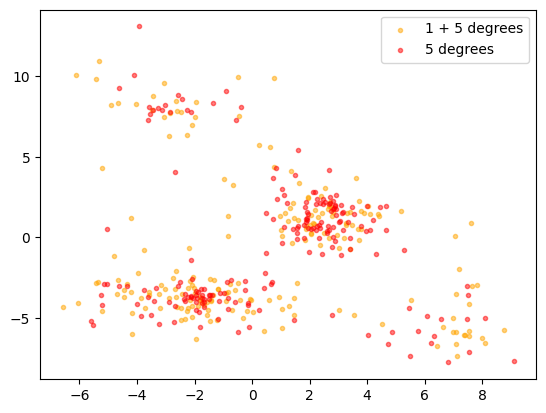

In [42]:
# plt.scatter(data_points[:, 1], data_points[:, 2], label="Real data points", color="blue", marker="s", alpha=0.5)
plt.scatter(fake[:, 1], fake[:, 2], label="1 + 5 degrees", color="orange", marker=".",alpha=0.5)
# plt.scatter(fake_1[:, 1], fake_1[:, 2], label="1 degrees", color="green", marker=".",alpha=0.5)
plt.scatter(fake_5[:, 1], fake_5[:, 2], label="5 degrees", color="red", marker=".",alpha=0.5)
plt.legend()
plt.show()